In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data=pd.read_csv("dataset_med.csv")
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05-04-2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10-09-2017,0
1,2,50,Female,Netherlands,20-04-2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17-06-2024,1
2,3,65,Female,Hungary,05-04-2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09-04-2024,0
3,4,51,Female,Belgium,05-02-2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23-04-2017,0
4,5,37,Male,Luxembourg,29-11-2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08-01-2025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,01-07-2022,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,23-02-2023,0
889996,889997,62,Female,Cyprus,27-09-2015,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,19-06-2017,0
889997,889998,48,Female,Estonia,27-03-2016,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,23-01-2017,1
889998,889999,67,Female,Slovakia,22-12-2015,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,12-12-2017,0


In [3]:
data.dtypes

id                      int64
age                     int64
gender                 object
country                object
diagnosis_date         object
cancer_stage           object
family_history         object
smoking_status         object
bmi                   float64
cholesterol_level       int64
hypertension            int64
asthma                  int64
cirrhosis               int64
other_cancer            int64
treatment_type         object
end_treatment_date     object
survived                int64
dtype: object

In [4]:
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'], format='%d-%m-%Y')
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'], format='%d-%m-%Y')


In [5]:
#creats the new column by performing the arithmetic operation
data['treatment_duration'] = (data['end_treatment_date'] - data['diagnosis_date']).dt.days
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
0,1,64,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,523
1,2,50,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,424
2,3,65,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,370
3,4,51,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,443
4,5,37,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0,237
889996,889997,62,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0,631
889997,889998,48,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1,302
889998,889999,67,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0,721


In [6]:
data["age"]=data["age"].astype(int)

In [7]:
data['age'].dtypes

dtype('int32')

## 1. Patient Demographics & Geographic Analysis

(i) What is the age distribution of patients across different cancer stages?

In [8]:
#1.1code
data["age_group"]=pd.cut(data["age"], bins=[0,20,40,60,80,110],labels=["0-20","20-40","40-60",
                                                                       "60-80","80-110"])
age_distribution = pd.crosstab(data["age_group"],data["cancer_stage"])
print("The age distribution of patients across different cancer stages:\n")
age_distribution 

The age distribution of patients across different cancer stages:



cancer_stage,Stage I,Stage II,Stage III,Stage IV
age_group,,,,
0-20,65,59,68,68
20-40,16329,16170,16316,16192
40-60,141510,141123,140958,141610
60-80,63401,63835,64054,63449
80-110,1211,1176,1198,1208


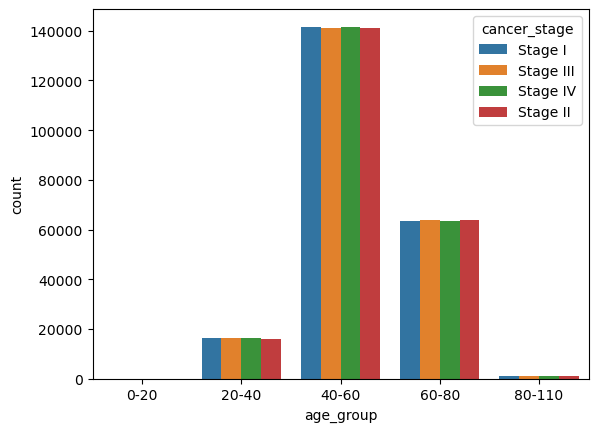

In [9]:
sns.countplot(data=data, x='age_group', hue='cancer_stage')
plt.show()

(ii) How many male and female patients are there, and what is the average age for each gender?

In [10]:
#1.2code
gender_count=data["gender"].value_counts()
print("No of male and female patients present are:\n",gender_count,"\n")
avg_age=data.groupby('gender')['age'].mean()
print("The average age for each gender is:\n",avg_age,"\n")

No of male and female patients present are:
 gender
Male      445134
Female    444866
Name: count, dtype: int64 

The average age for each gender is:
 gender
Female    55.016457
Male      54.997565
Name: age, dtype: float64 



<Axes: xlabel='age_group', ylabel='count'>

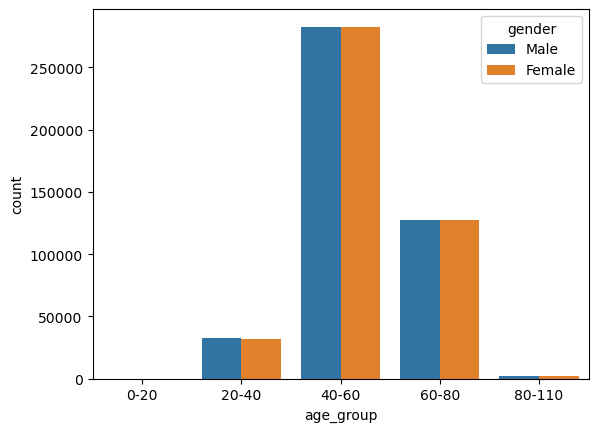

In [11]:
sns.countplot(hue='gender', x='age_group', data=data)

(iii) Are there significant gender-based differences in survival rates, treatment types, or cancer stage at diagnosis?

In [12]:
#1.3 code
combination=["survived","treatment_type","cancer_stage"]
gender_based_diff=data.groupby("gender")[combination].count()
print("The significant gender-based differences in survival rates, treatment types, or cancer stage at diagnosis:\n",gender_based_diff,"\n")

The significant gender-based differences in survival rates, treatment types, or cancer stage at diagnosis:
         survived  treatment_type  cancer_stage
gender                                        
Female    444866          444866        444866
Male      445134          445134        445134 



(iv) Which countries have the most patients and show the best survival rates?

In [13]:
#1.4 code
count = data.groupby('country')['id'].count().reset_index(name='patient_count')
count = count.sort_values(by='patient_count', ascending=False)
count
survival = data.groupby('country')['survived'].mean().reset_index(name='survival_rate')
survival['survival_rate'] = survival['survival_rate'] * 100  
survival = survival.sort_values(by='survival_rate', ascending=False)
survival
country_stats = pd.merge(count, survival, on='country')
country_stats
top_countries = country_stats.sort_values(by=['patient_count', 'survival_rate'], ascending=False)
print("\nTOP 7 COUNTRIES BY PATIENT COUNT AND THEIR SURVIVAL RATES:\n")
print(top_countries.head(7))


TOP 7 COUNTRIES BY PATIENT COUNT AND THEIR SURVIVAL RATES:

    country  patient_count  survival_rate
0     Malta          33367      22.255522
1   Ireland          33243      21.902355
2  Portugal          33208      22.199470
3    France          33199      21.575951
4    Sweden          33161      21.606707
5   Croatia          33138      21.989861
6    Greece          33052      21.950260


(v)	Does age at diagnosis vary across different countries or stages, and how does this affect treatment decisions?

In [14]:
#1.5 code for average age based on countries
avg_country = data.groupby("country")["age"].mean()
print("Age at diagnosis across countries:\n",avg_country.sort_values(ascending=False),"\n")

Age at diagnosis across countries:
 country
Estonia           55.144468
Bulgaria          55.114623
Italy             55.100704
Poland            55.088349
Germany           55.075379
France            55.066086
Ireland           55.063532
Portugal          55.039448
Slovakia          55.030773
Romania           55.018839
Lithuania         55.016009
Sweden            55.015741
Croatia           55.009144
Greece            55.000424
Czech Republic    54.995074
Netherlands       54.986199
Latvia            54.975772
Austria           54.971248
Slovenia          54.955885
Malta             54.955255
Belgium           54.949191
Denmark           54.946978
Finland           54.943869
Hungary           54.942816
Luxembourg        54.938647
Cyprus            54.928176
Spain             54.916591
Name: age, dtype: float64 



In [15]:
#1.5.2
avg_stage = data.groupby("cancer_stage")["age"].mean()
print("Age at diagnosis across different cancer stages:\n",avg_stage,"\n")

Age at diagnosis across different cancer stages:
 cancer_stage
Stage I      54.992805
Stage II     55.000360
Stage III    55.023801
Stage IV     55.011055
Name: age, dtype: float64 



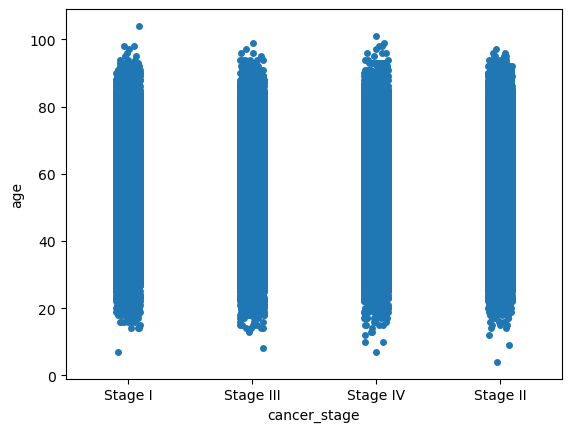

In [16]:
sns.stripplot(x='cancer_stage',y='age',data=data)
plt.show()

In [17]:
#1.5.3 code
treatment=pd.crosstab(data["age_group"],data["treatment_type"])
treatment

treatment_type,Chemotherapy,Combined,Radiation,Surgery
age_group,,,,
0-20,66,62,68,64
20-40,16351,16433,16076,16147
40-60,141472,141323,140504,141902
60-80,64198,63585,63025,63931
80-110,1175,1206,1195,1217


## 2. Cancer Stage & Survival Analysis

(i)	What are the survival rates across different cancer stages (Stage I to IV)?

In [18]:
#2.1 code
survival_rate = data.groupby("cancer_stage")["survived"].mean()*100
print("The survival rates across different cancer stages:\n", survival_rate)

The survival rates across different cancer stages:
 cancer_stage
Stage I      21.813263
Stage II     22.089107
Stage III    22.052706
Stage IV     22.136640
Name: survived, dtype: float64


(ii) Which cancer stage has the highest death rate?

In [19]:
#2.2 code
deaths = data[data['survived'] == 0].groupby('cancer_stage').size()*100
totals = data.groupby('cancer_stage').size()
death_rate = deaths / totals
most_stage = death_rate.idxmax()
print("Total deatn rate:\n",death_rate)
max_death_rate = death_rate.max()
print("The highest death rate is ", most_stage," with death rate:",max_death_rate)

Total deatn rate:
 cancer_stage
Stage I      78.186737
Stage II     77.910893
Stage III    77.947294
Stage IV     77.863360
dtype: float64
The highest death rate is  Stage I  with death rate: 78.1867371335095


(iii) How does survival probability change across different age groups?

In [20]:
#2.3 code
survival_probability = data.groupby("age_group",observed=True
                            )["survived"].mean().reset_index(name="probability_survival")
survival_probability

,age_group,probability_survival
0,0-20,0.261538
1,20-40,0.217161
2,40-60,0.220461
3,60-80,0.220465
4,80-110,0.219695


(iv) What is the impact of early-stage vs late-stage diagnosis on survival outcomes?

In [21]:
#2.4 code
df=data[['survived','cancer_stage']].copy()
df['grouped_stage']=df['cancer_stage'].map({'Stage I':'early_stage','Stage II':'early_stage','Stage III':'late_stage','Stage IV':'late_stage'})
df

,survived,cancer_stage,grouped_stage
0,0,Stage I,early_stage
1,1,Stage III,late_stage
2,0,Stage III,late_stage
3,0,Stage I,early_stage
4,0,Stage I,early_stage
...,...,...,...
889995,0,Stage IV,late_stage
889996,0,Stage II,early_stage
889997,1,Stage III,late_stage
889998,0,Stage IV,late_stage


In [22]:
survival_rate=df.groupby('grouped_stage')['survived'].mean()*100
survival_rate=survival_rate.reset_index(name="survival_rate")
print("\nimpact of early-stage vs late-stage diagnosis on survival outcomes\n")
survival_rate


impact of early-stage vs late-stage diagnosis on survival outcomes



,grouped_stage,survival_rate
0,early_stage,21.951137
1,late_stage,22.094666


[]

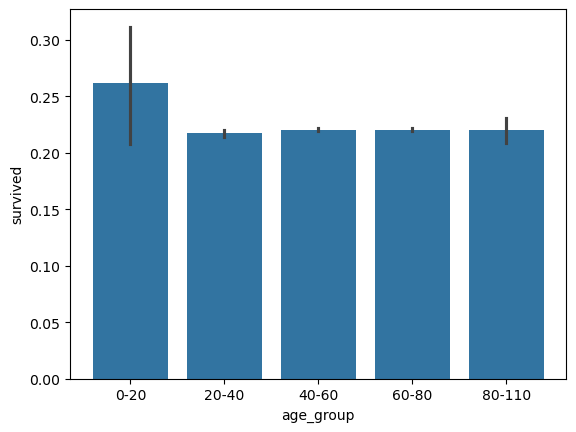

In [23]:
sns.barplot(y='survived',x='age_group',data=data)
plt.plot()

(v) How is cancer stage distributed among patients at the time of diagnosis?

In [24]:
#2.5 code
stage_counts = data['cancer_stage'].value_counts().sort_index()
stage_percent = data['cancer_stage'].value_counts(normalize=True).sort_index()*100
stage_distribution = pd.DataFrame({
    'Count': stage_counts,
    'Percentage': stage_percent.round(3)
})
print(stage_distribution)

               Count  Percentage
cancer_stage                    
Stage I       222516      25.002
Stage II      222363      24.985
Stage III     222594      25.011
Stage IV      222527      25.003


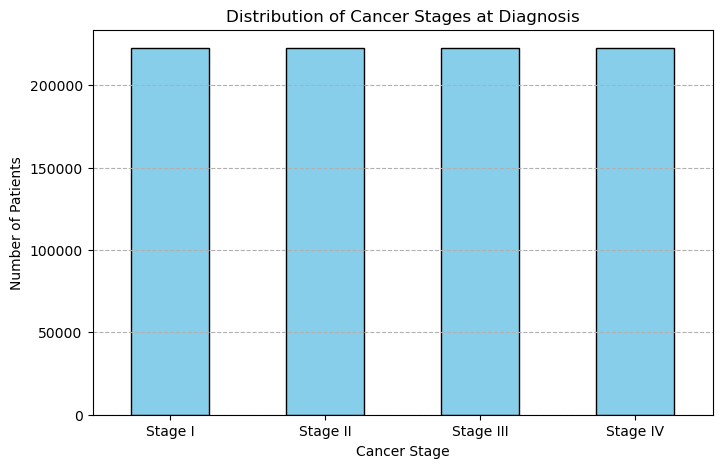

In [25]:
plt.figure(figsize=(8, 5))
stage_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cancer Stages at Diagnosis')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

## 3. Treatment Effectiveness & Patterns

(i) Which treatment types (Chemotherapy, Surgery, Radiation, Combined) yield the highest survival rates for each cancer stage?

In [26]:
#3.1 code
highest_survival=(data.groupby("treatment_type")["survived"].mean()*100).reset_index(name="survival")
print("Treatment type yielding highest survival rate for each cancer stage:\n")
highest_survival.sort_values(by="survival",ascending=False).head()

Treatment type yielding highest survival rate for each cancer stage:



,treatment_type,survival
3,Surgery,22.149860
2,Radiation,22.055707
1,Combined,22.012587
0,Chemotherapy,21.873852


(ii) What treatment method is most commonly used, and does it vary by cancer stage?

In [27]:
#3.2.1
treatment_used=data["treatment_type"].value_counts()
treatment_id=treatment_used.idxmax()
print("The most commonly used treatment is :" ,treatment_id," with count:", max(treatment_used))

The most commonly used treatment is : Chemotherapy  with count: 223262


In [28]:
#3.2.2 code
vary_order=pd.crosstab(data["cancer_stage"],data["treatment_type"])
print(vary_order)

treatment_type  Chemotherapy  Combined  Radiation  Surgery
cancer_stage                                              
Stage I                55664     55377      55462    56013
Stage II               55763     55506      55210    55884
Stage III              55910     55910      54972    55802
Stage IV               55925     55816      55224    55562


<Figure size 400x200 with 0 Axes>

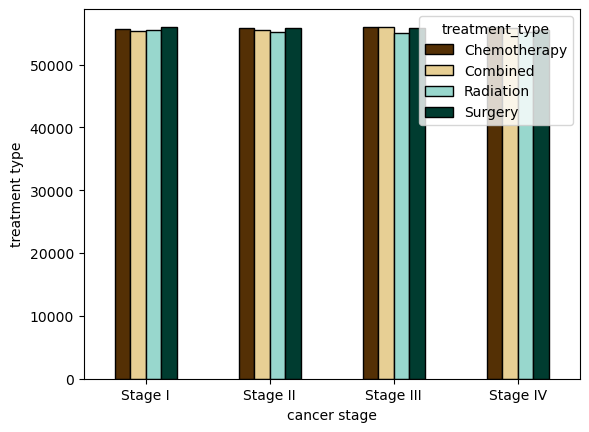

In [29]:
#3.2.3 code
plt.figure(figsize=(4,2))
vary_order.plot(kind="bar",cmap="BrBG",edgecolor="black")
plt.ylabel("treatment type")
plt.xlabel("cancer stage")
plt.xticks(rotation=0)
plt.show()

(iii) What is the survival rate for patients receiving combination treatment vs. single treatment methods?

In [30]:
#3.3 code
treatment_group=data['treatment_type'].apply(lambda x:'combined' if x=='Combined' else 'single')
df=pd.DataFrame(treatment_group)
df['survived']=data['survived']
survival_rate=df.groupby('treatment_type')['survived'].mean()*100
survival_rate=survival_rate.reset_index(name='survival_rate').round()
print("\nsurvival rate for patients receiving combination treatment vs. single treatment:")
survival_rate


survival rate for patients receiving combination treatment vs. single treatment:


,treatment_type,survival_rate
0,combined,22.0
1,single,22.0


In [31]:
mean_duration = data.groupby("treatment_type")["treatment_duration"].mean().round(3)
mean_duration

treatment_type
Chemotherapy    458.395
Combined        457.815
Radiation       458.403
Surgery         457.737
Name: treatment_duration, dtype: float64

(iv)What is the average treatment duration from diagnosis to completion, and how does this impact survival?

In [32]:
avg_duration=data.groupby('treatment_type')['treatment_duration'].mean().round(3).reset_index(name='average_duration(days)')

In [33]:
survival_by_treatment=data.groupby('treatment_type')['survived'].mean()*100
survival_by_treatment=survival_by_treatment.reset_index(name='survival_rate(%)').round(2)

In [34]:
print("\nrelating survival probability with treatment type and its duration\n")
avg_duration.merge(survival_by_treatment,on='treatment_type')


relating survival probability with treatment type and its duration



,treatment_type,average_duration(days),survival_rate(%)
0,Chemotherapy,458.395,21.87
1,Combined,457.815,22.01
2,Radiation,458.403,22.06
3,Surgery,457.737,22.15


(v) Are treatment durations shorter in patient profiles or countries with higher survival rates?

In [35]:
profile=data.groupby(['age_group','cancer_stage'],observed=True).agg({'survived':'mean','treatment_duration':'mean' }).reset_index()
profile['survived']=(profile['survived']*100).round(2)
profile['treatment_duration']=profile['treatment_duration'].round(2)
profile

,age_group,cancer_stage,survived,treatment_duration
0,0-20,Stage I,36.92,498.65
1,0-20,Stage II,23.73,491.20
2,0-20,Stage III,17.65,451.84
3,0-20,Stage IV,26.47,408.07
4,20-40,Stage I,21.71,512.76
5,20-40,Stage II,21.75,476.89
6,20-40,Stage III,21.78,440.80
7,20-40,Stage IV,21.62,403.68
8,40-60,Stage I,21.89,512.41
9,40-60,Stage II,22.05,475.79


In [36]:
country_stats=data.groupby(['country'],observed=True).agg({'survived':'mean','treatment_duration':'mean' }).reset_index()
country_stats['survived']=(country_stats['survived']*100).round(2)
country_stats['treatment_duration']=country_stats['treatment_duration'].round(2)
country_stats

,country,survived,treatment_duration
0,Austria,21.79,458.62
1,Belgium,21.96,457.98
2,Bulgaria,22.04,458.92
3,Croatia,21.99,457.79
4,Cyprus,22.04,457.46
5,Czech Republic,22.29,458.90
6,Denmark,21.94,457.58
7,Estonia,22.31,458.31
8,Finland,22.25,458.73
9,France,21.58,457.47


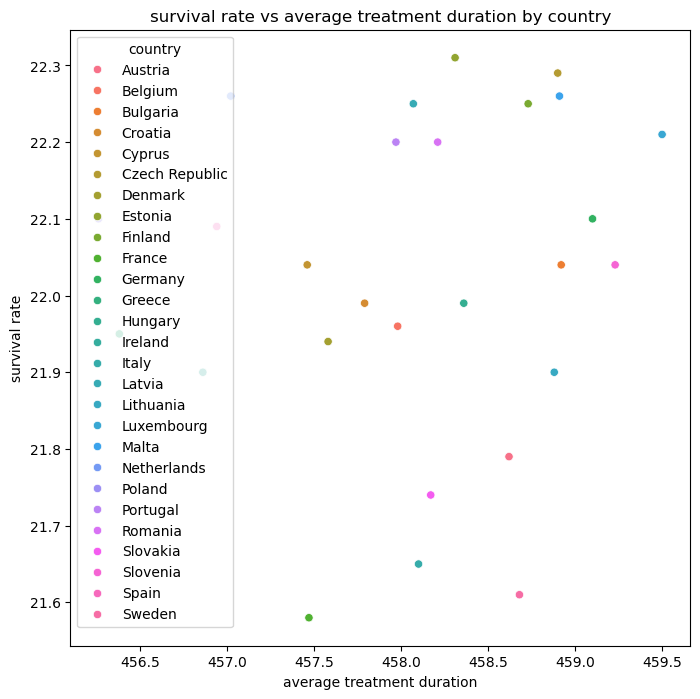

In [37]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='treatment_duration',y='survived',hue='country',data=country_stats)
plt.title('survival rate vs average treatment duration by country')
plt.xlabel('average treatment duration')
plt.ylabel('survival rate')
plt.show()

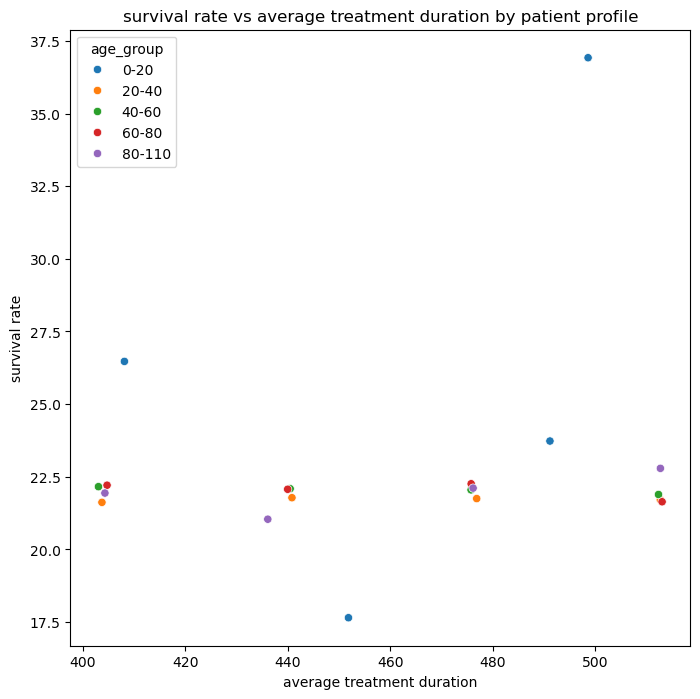

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='treatment_duration',y='survived',hue='age_group',data=profile)
plt.title('survival rate vs average treatment duration by patient profile')
plt.xlabel('average treatment duration')
plt.ylabel('survival rate')
plt.show()

## 4. Lifestyle Factors & Risk Assessment

(i) How does smoking status correlate with survival rates and cancer stage severity?

In [39]:
#4.1.1 code
smoking_survival=data.groupby('smoking_status')['survived'].mean()*100
smoking_survival=smoking_survival.reset_index(name='survival_rate')
smoking_survival

,smoking_status,survival_rate
0,Current Smoker,22.033998
1,Former Smoker,21.964074
2,Never Smoked,22.091034
3,Passive Smoker,22.002509


In [40]:
#4.1.2 code
somking_cancer=pd.crosstab(data["smoking_status"],data["cancer_stage"],normalize='index')
somking_cancer

cancer_stage,Stage I,Stage II,Stage III,Stage IV
smoking_status,,,,
Current Smoker,0.250466,0.249795,0.251061,0.248677
Former Smoker,0.249733,0.250692,0.249526,0.250048
Never Smoked,0.250347,0.249004,0.249507,0.251141
Passive Smoker,0.249527,0.249895,0.250329,0.250249


(ii) How do different BMI levels affect survival rates and post-treatment outcomes?

In [41]:
#4.2 code
count=pd.cut(data["bmi"], bins=[0,18.5,24.9,29.9,100],labels=["Under Weight"
                                                                     ,"Normal Weight","Over Weight", "Obese"])
count=pd.DataFrame(count)
count["survived"]=data["survived"]
count.columns=["bmi_category","survived"]
count

,bmi_category,survived
0,Over Weight,0
1,Obese,1
2,Obese,0
3,Obese,0
4,Normal Weight,0
...,...,...
889995,Obese,0
889996,Normal Weight,0
889997,Obese,1
889998,Normal Weight,0


In [42]:
bmi_survival=(count.groupby("bmi_category",observed=True)["survived"].mean()*100).reset_index(name="survival_rate")
bmi_survival

,bmi_category,survival_rate
0,Under Weight,21.985218
1,Normal Weight,22.030430
2,Over Weight,22.008952
3,Obese,22.030767


<Axes: xlabel='bmi_category', ylabel='survived'>

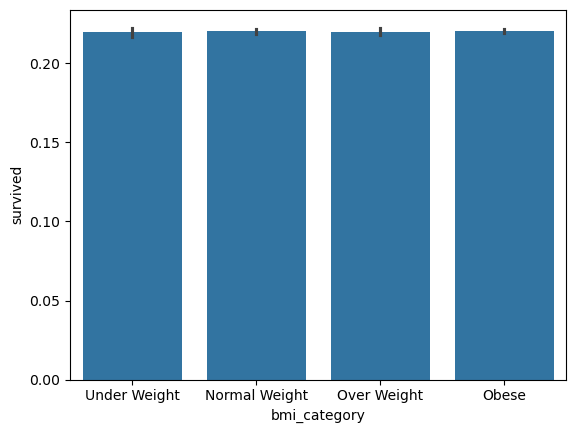

In [43]:
x=count["bmi_category"]
y=count["survived"]
sns.barplot(x=count["bmi_category"], y=count["survived"])

## 5. Comorbidities & Health Conditions

(i) How do comorbidities like asthma, hypertension, or liver cirrhosis affect cancer stage and survival rates?

In [44]:
#5.1 code
survival_by_asthma = pd.crosstab(data['asthma'], data['cancer_stage'], 
                                 normalize='index') * 100
survival_by_asthma

cancer_stage,Stage I,Stage II,Stage III,Stage IV
asthma,,,,
0,24.977168,24.936696,25.038194,25.047941
1,25.029600,25.038690,24.979369,24.952340


In [45]:
survival_by_hytn = pd.crosstab(data['hypertension'], data['cancer_stage'],normalize='index') * 100
survival_by_hytn

cancer_stage,Stage I,Stage II,Stage III,Stage IV
hypertension,,,,
0,25.085514,24.966401,24.954265,24.993820
1,24.973896,24.990674,25.029325,25.006105


In [46]:
survival_by_lc = pd.crosstab(data['cirrhosis'], data['cancer_stage'],
                                 normalize='index') * 100
survival_by_lc

cancer_stage,Stage I,Stage II,Stage III,Stage IV
cirrhosis,,,,
0,25.020504,24.953005,25.015568,25.010923
1,24.937718,25.092864,24.993411,24.976007


(ii) What are the survival rates for patients with multiple comorbidities compared to those with single conditions?

In [47]:
comorbidities = ['asthma', 'hypertension', 'cirrhosis']
lis = []

for i in comorbidities:
    temp = data[[i, 'cancer_stage', 'survived']].copy()
    temp['comorbidity'] = i
    temp['has_comorbidity'] = temp[i].map({1: 'Yes', 0: 'No'})
    lis.append(temp[['comorbidity', 'has_comorbidity', 'cancer_stage', 'survived']])

comorbidity_df = pd.concat(lis)
print(comorbidity_df.head())  # Optional for output


  comorbidity has_comorbidity cancer_stage  survived
0      asthma              No      Stage I         0
1      asthma             Yes    Stage III         1
2      asthma             Yes    Stage III         0
3      asthma             Yes      Stage I         0
4      asthma              No      Stage I         0


In [49]:
comorbidities = ['asthma', 'hypertension', 'cirrhosis']
lis= []
for i in comorbidities:
    temp = data[[i, 'cancer_stage', 'survived']].copy()
    temp['comorbidity'] = i
    temp['has_comorbidity'] = temp[i].map({1: 'Yes', 0: 'No'})
    lis.append(temp[['comorbidity', 'has_comorbidity', 'cancer_stage', 'survived']])
comorbidity_df = pd.concat(lis)
comorbidity_df.loc[:, 'comorbidity_count'] = data[comorbidities].sum(axis=1)
comorbidity_df['comorbidity_group'] = comorbidity_df['comorbidity_count'].apply(lambda x: 'Single' if x == 1 else 'Multiple')
comorbidity_df

,comorbidity,has_comorbidity,cancer_stage,survived,comorbidity_count,comorbidity_group
0,asthma,No,Stage I,0,1,Single
1,asthma,Yes,Stage III,1,2,Multiple
2,asthma,Yes,Stage III,0,2,Multiple
3,asthma,Yes,Stage I,0,2,Multiple
4,asthma,No,Stage I,0,0,Multiple
...,...,...,...,...,...,...
889995,cirrhosis,Yes,Stage IV,0,3,Multiple
889996,cirrhosis,No,Stage II,0,0,Multiple
889997,cirrhosis,No,Stage III,1,1,Single
889998,cirrhosis,No,Stage IV,0,2,Multiple


In [51]:
survival_rates = comorbidity_df.groupby(['comorbidity_group'])['survived'].mean() * 100
survival_rates = survival_rates.round(1).reset_index(name='survival_rate')

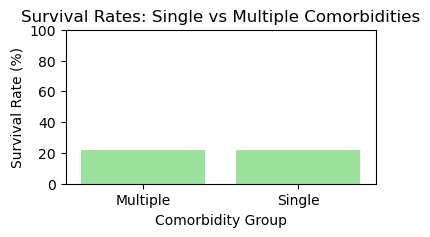

In [52]:
plt.figure(figsize=(4, 2))
sns.barplot(x='comorbidity_group', y='survival_rate', data=survival_rates, color='lightgreen')
plt.title('Survival Rates: Single vs Multiple Comorbidities')
plt.xlabel('Comorbidity Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

## 6. Family History & Genetic Factors

(i) Does family history of cancer lead to diagnosis at earlier ages, and what are their survival rates?

In [53]:
#6.1 code
early=data.groupby('family_history')['age'].mean().round(3)
early=early.reset_index(name='age')
early

,family_history,age
0,No,55.018
1,Yes,54.996


<Axes: xlabel='family_history', ylabel='age'>

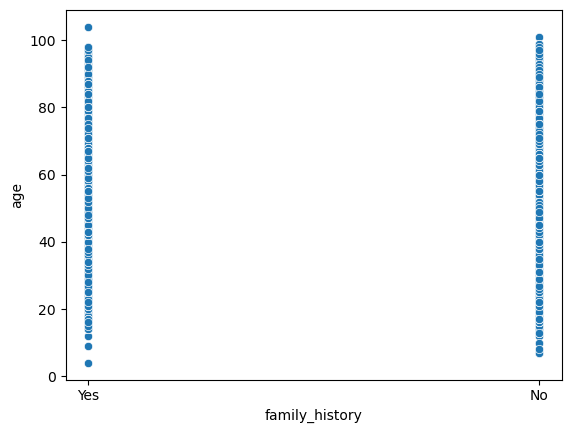

In [54]:
sns.scatterplot(x='family_history',y='age',data=data)

(ii) Do patients with family history tend to be diagnosed at earlier stages compared to those without?

In [55]:
#6.2 code
early_=(pd.crosstab(data['family_history'],data['cancer_stage'],normalize='index')*100).round(3)
early_

cancer_stage,Stage I,Stage II,Stage III,Stage IV
family_history,,,,
No,25.073,24.911,24.982,25.034
Yes,24.930,25.058,25.039,24.972


<Axes: xlabel='family_history', ylabel='cancer_stage'>

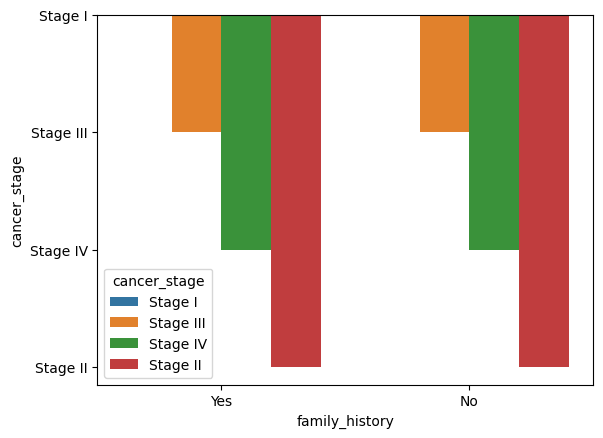

In [56]:
sns.barplot(x='family_history',y='cancer_stage',data=data,hue='cancer_stage')

## 7. Multiple Cancer Cases

(i) How does the presence of additional cancers impact treatment effectiveness and survival probability?

In [58]:
#7.1 code
cancer_group = data['other_cancer'].apply(lambda x: 'Single' if x == 0 else 'Multiple')
df=pd.DataFrame({ 'cancer_group':cancer_group})
df['survived']=data['survived']
df

,cancer_group,survived
0,Single,0
1,Single,1
2,Single,0
3,Single,0
4,Single,0
...,...,...
889995,Single,0
889996,Single,0
889997,Single,1
889998,Single,0


In [59]:
impact=(df.groupby('cancer_group')['survived'].mean()*100).round(2)
impact

cancer_group
Multiple    21.76
Single      22.05
Name: survived, dtype: float64

(ii) Does having multiple cancers significantly decrease overall survival rates?

In [60]:
#7.2 code
overall_survival=data.groupby('other_cancer')['survived'].mean()
overall_survival.reset_index(name='survival_rate')

,other_cancer,survival_rate
0,0,0.220483
1,1,0.217601


<Axes: xlabel='other_cancer', ylabel='survived'>

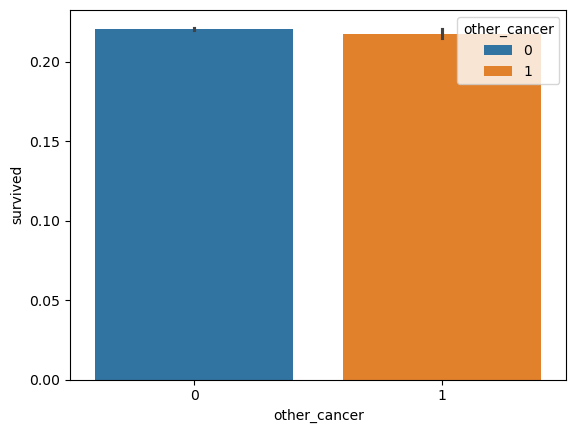

In [61]:
sns.barplot(x='other_cancer',y='survived',data=data,hue='other_cancer')

## 8. Time-Based Analysis & Trends

(i) How many patients have both diagnosis and end treatment dates, and what is their recovery time span?

In [62]:
#8.1 code
missing_diagnosis=data['diagnosis_date'].isnull().sum()
print("Missing Daignosis dates: ",missing_diagnosis)
missing_end_treatment=data['end_treatment_date'].isnull().sum()
print("missing End Treatment dates:",missing_end_treatment)
if(missing_diagnosis==0 and missing_end_treatment==0):
    print("All patients have both diagnosis and end treatment dates")
print("Recover Time Span: \n")
print(data['treatment_duration'].describe())

Missing Daignosis dates:  0
missing End Treatment dates: 0
All patients have both diagnosis and end treatment dates
Recover Time Span: 

count    890000.000000
mean        458.087170
std         139.326048
min         183.000000
25%         367.000000
50%         458.000000
75%         550.000000
max         730.000000
Name: treatment_duration, dtype: float64


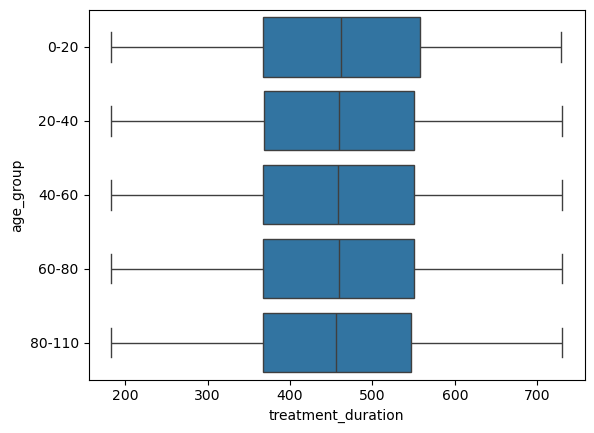

In [63]:
sns.boxplot(x='treatment_duration',y='age_group',data=data)
plt.show()

(ii) How does the time from diagnosis to treatment completion affect survival outcomes?

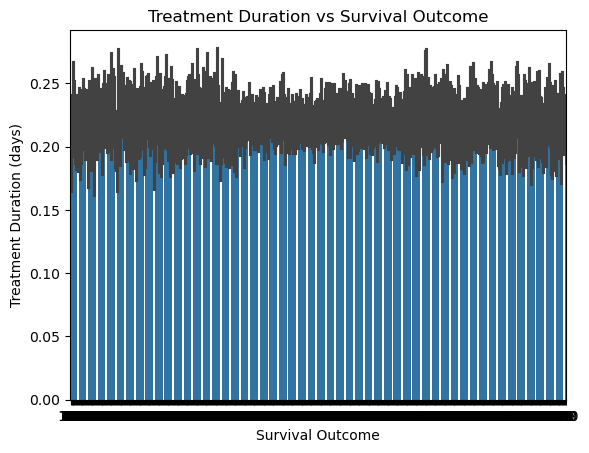

In [64]:
#8.2 codoe
sns.barplot(y='survived', x='treatment_duration', data=data)
plt.title('Treatment Duration vs Survival Outcome')
plt.xlabel('Survival Outcome')
plt.ylabel('Treatment Duration (days)')
plt.show()


In [65]:
survival_by_c = pd.crosstab(data['cholesterol_level'], data['cancer_stage'],margins=True)
survival_by_c

cancer_stage,Stage I,Stage II,Stage III,Stage IV,All
cholesterol_level,,,,,
150,589,583,630,583,2385
151,1133,1156,1196,1198,4683
152,1181,1193,1222,1142,4738
153,1188,1219,1165,1177,4749
154,1224,1226,1270,1230,4950
...,...,...,...,...,...
297,1917,1872,1898,1883,7570
298,1953,1921,1892,1879,7645
299,1872,1955,1944,1936,7707
